In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy    
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm


In [3]:
def readfile(filename):
    atom_vec = []
    for r in open(filename):
        if not r[0] in ('I','#','0','\n'):
            r = r[:-1]
            #print(r)
            tuples = [float(y) for y in r.split(" ")]
            #print(tuples)
            atom_vec.append(tuples)
    return atom_vec


In [4]:
veclist = []
for i in range(1,6):
    veclist.append(readfile("2x_0.00"+str(i)+"_disps_sorted.dump"))

In [5]:
def reshape_data(atomvec):
    frame_count=0
    atom_vec_arr=[]
    
    for i in atomvec:
        if len(i)==1 or len(i)==3:
            frame_count=frame_count+1
        if len(i)==6:
            atom_vec_arr.append(i)


    frame_count=frame_count/5

    frame_count=int(frame_count)


    atom_vec_arr = np.array(atom_vec_arr)

    atom_dat=np.reshape(atom_vec_arr,(frame_count,len(atom_vec_arr)//frame_count,len(atom_vec_arr[0])))

    return atom_dat

In [6]:
sims_data = []

for i in veclist:
    a = reshape_data(i)
    #a = a[a[:, 0].argsort()]
    sims_data.append(a)

In [7]:
print(sims_data[0][0])

[[7.60000e+01 3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.06000e+02 3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.17000e+02 3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 ...
 [1.77030e+04 3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.77070e+04 3.00000e+00 0.00000e+00 7.10543e-15 0.00000e+00 7.10543e-15]
 [1.77190e+04 3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]


In [8]:
x2_001_disps = sims_data[0][9000]
x2_002_disps = sims_data[1][9000]
x2_003_disps = sims_data[2][9000]
x2_004_disps = sims_data[3][9000]
x2_005_disps = sims_data[4][9000]


In [9]:
print(len(x2_001_disps))

900


In [10]:
x2_001_trace = sims_data[0][:,:,2]
x2_002_trace = sims_data[1][:,:,2]
x2_003_trace = sims_data[2][:,:,2]
x2_004_trace = sims_data[3][:,:,2]
x2_005_trace = sims_data[4][:,:,2]

In [11]:
x2_001_trace_tpose = x2_001_trace.T
x2_002_trace_tpose = x2_002_trace.T
x2_003_trace_tpose = x2_003_trace.T
x2_004_trace_tpose = x2_004_trace.T
x2_005_trace_tpose = x2_005_trace.T

In [12]:
def count_jumps(trace,leap):

    jumps_per_ion_per_ps = []
    count_right = 0
    count_left = 0
    for i in trace:
        grads = np.gradient(i,1)
        for j in grads:
            if j > leap:
                count_right = count_right+1
            if j < -leap:
                count_left = count_left-1
        jumps_per_ion_per_ps.append([count_left,count_right])
        count_right = 0
        count_left = 0
    jp = np.array(jumps_per_ion_per_ps)
    return jp
    
        


In [38]:
leap = 2
x2_001_jumps = count_jumps(x2_001_trace_tpose,2)
x2_002_jumps = count_jumps(x2_002_trace_tpose,2)
x2_003_jumps = count_jumps(x2_003_trace_tpose,2)
x2_004_jumps = count_jumps(x2_004_trace_tpose,2)
x2_005_jumps = count_jumps(x2_005_trace_tpose,2)

In [39]:
lst_right = [x2_001_jumps[:,1],
       x2_002_jumps[:,1],
       x2_003_jumps[:,1],
       x2_004_jumps[:,1],
       x2_005_jumps[:,1]]

lst_left = [x2_001_jumps[:,0],
       x2_002_jumps[:,0],
       x2_003_jumps[:,0],
       x2_004_jumps[:,0],
       x2_005_jumps[:,0]]

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


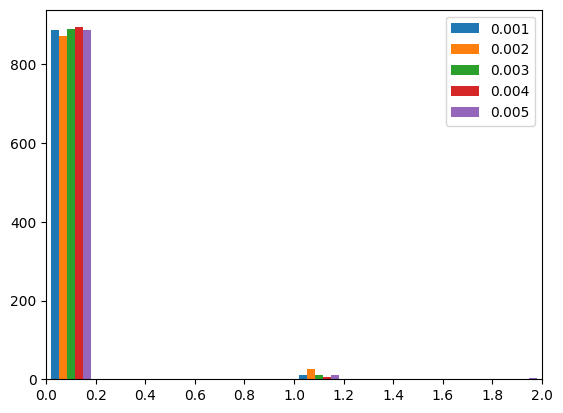

In [45]:
lims = np.linspace(0,2,11)
print(lims)

bns = lims
bns = np.array(bns)
bns_inv = np.flip(np.negative(bns))
lbl = ["0.001","0.002","0.003","0.004","0.005"]
out = plt.hist(lst_right,bins=bns,stacked=False,label=lbl)
plt.xlim([0,2.0])
plt.xticks(bns)
plt.legend()


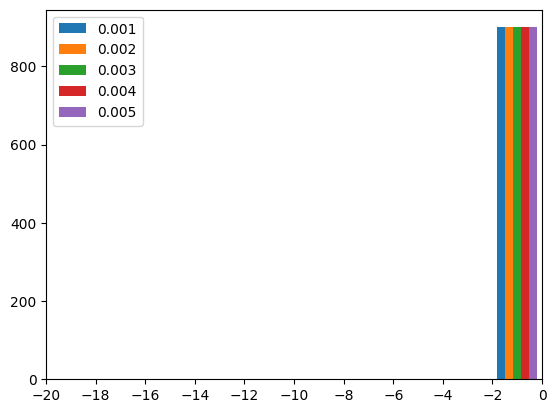

In [41]:
out = plt.hist(lst_left,bins=bns_inv,stacked=False,label=lbl)
plt.xlim([-20,0])
plt.xticks(bns_inv)
plt.legend()

(0.0, 15.0)

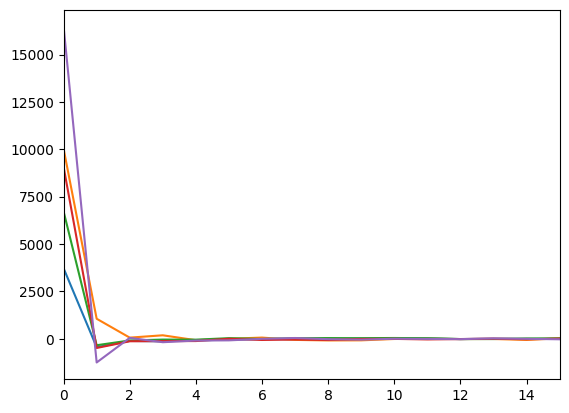

In [178]:
plt.plot(np.fft.fft(np.average(x2_001_trace_tpose,axis=0)).real)
#plt.plot(np.fft.fft(np.average(x2_001_trace_tpose,axis=0)).imag)

plt.plot(np.fft.fft(np.average(x2_002_trace_tpose,axis=0)).real)
#plt.plot(np.fft.fft(np.average(x2_002_trace_tpose,axis=0)).imag)

plt.plot(np.fft.fft(np.average(x2_003_trace_tpose,axis=0)).real)
#plt.plot(np.fft.fft(np.average(x2_003_trace_tpose,axis=0)).imag)

plt.plot(np.fft.fft(np.average(x2_004_trace_tpose,axis=0)).real)
#plt.plot(np.fft.fft(np.average(x2_004_trace_tpose,axis=0)).imag)

plt.plot(np.fft.fft(np.average(x2_005_trace_tpose,axis=0)).real)
#plt.plot(np.fft.fft(np.average(x2_005_trace_tpose,axis=0)).imag)
plt.xlim([0,15])

In [159]:
fft_arr_x2_001 = []

for i in x2_001_trace_tpose:
    fft_arr_x2_001.append(np.fft.fft(i))

fft_arr_x2_001 = np.array(fft_arr_x2_001)


In [160]:
x2_001fft = np.average(fft_arr_x2_001,axis=0)

(0.0, 50.0)

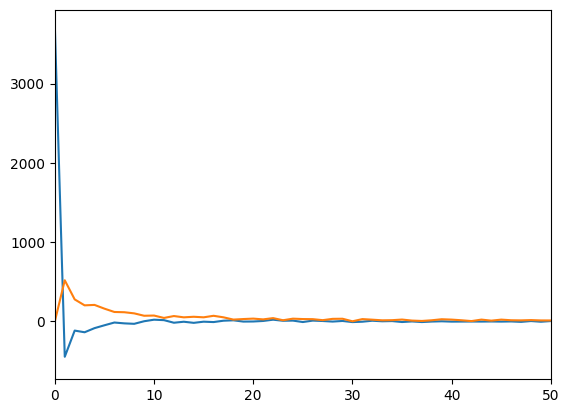

In [166]:
plt.plot(x2_001fft.real)
plt.plot(x2_001fft.imag)
plt.xlim([0,50])

In [142]:
acf2_001 = []
for i in x2_001_trace_tpose:
    acf2_001.append(sm.tsa.stattools.acf(i))

acf2_002 = []
for i in x2_002_trace_tpose:
    acf2_002.append(sm.tsa.stattools.acf(i))
    
acf2_003 = []
for i in x2_003_trace_tpose:
    acf2_003.append(sm.tsa.stattools.acf(i))

acf2_004 = []
for i in x2_004_trace_tpose:
    acf2_004.append(sm.tsa.stattools.acf(i))

acf2_005 = []
for i in x2_005_trace_tpose:
    acf2_005.append(sm.tsa.stattools.acf(i))

acflist = [acf2_001,acf2_002,acf2_003,acf2_004,acf2_005]


In [143]:
avgsacf = [np.average(a,axis=0) for a in acflist]

In [135]:
print(len(avgsacf[5]))

IndexError: list index out of range

(0.84, 0.95)

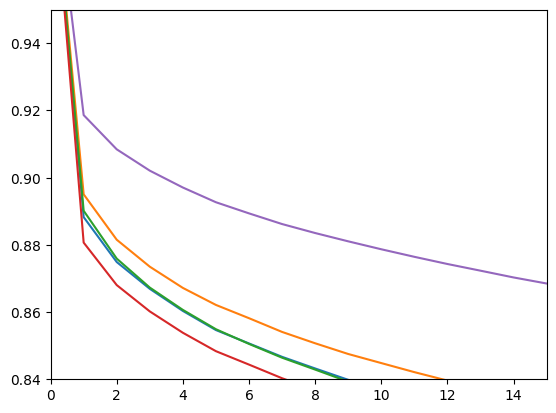

In [152]:
plt.plot(avgsacf[0])
plt.plot(avgsacf[1])
plt.plot(avgsacf[2])
plt.plot(avgsacf[3])
plt.plot(avgsacf[4])
plt.xlim([0,15])
plt.ylim([0.84,0.95])

In [27]:
d0_1_2x_disps = x2_001_disps[:,2]
d0_2_2x_disps = x2_002_disps[:,2]
d0_3_2x_disps = x2_003_disps[:,2]
d0_4_2x_disps = x2_004_disps[:,2]
d0_5_2x_disps = x2_005_disps[:,2]

In [28]:
ledat = [d0_1_2x_disps,d0_2_2x_disps,d0_3_2x_disps,d0_4_2x_disps,d0_5_2x_disps]
lbl = ["0.001","0.002","0.003","0.004","0.005"]

In [17]:
data_array = np.array(ledat)

(array([0.00078156, 0.00156312, 0.00234469, 0.01328655, 0.0265731 ,
        0.04923839, 0.07659305, 0.12426831, 0.12348675, 0.11723426,
        0.07424836, 0.04533058, 0.02110217, 0.01719436, 0.00547093,
        0.00312625, 0.        , 0.        , 0.00078156, 0.00078156]),
 array([-11.6346  , -10.212945,  -8.79129 ,  -7.369635,  -5.94798 ,
         -4.526325,  -3.10467 ,  -1.683015,  -0.26136 ,   1.160295,
          2.58195 ,   4.003605,   5.42526 ,   6.846915,   8.26857 ,
          9.690225,  11.11188 ,  12.533535,  13.95519 ,  15.376845,
         16.7985  ]),
 <BarContainer object of 20 artists>)

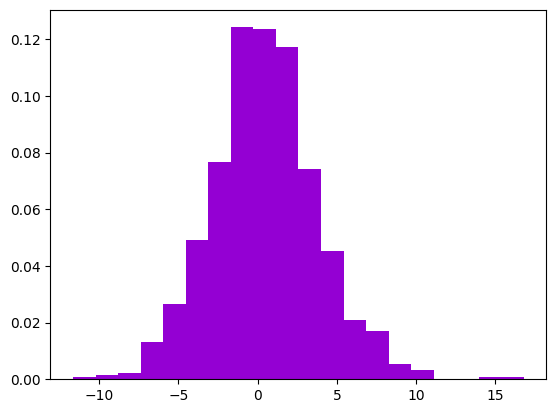

In [29]:
plt.hist(ledat[0],bins=20,density=True,stacked=False,label=lbl,color="darkviolet")

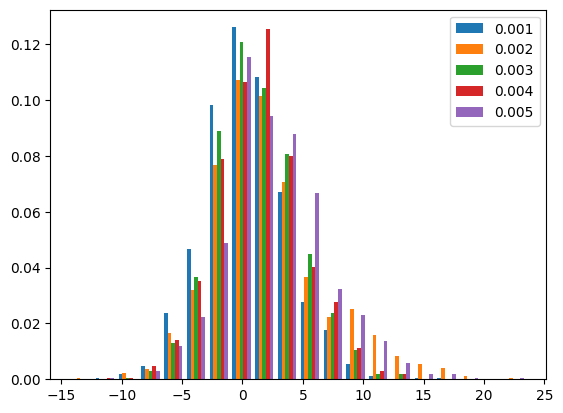

In [ ]:
lbl = ["0.001","0.002","0.003","0.004","0.005"]
out = plt.hist(ledat,bins=20,density=True,stacked=False,label=lbl)
plt.legend()


In [26]:
print(ledat[0])

[ 4.00980e+00 -2.05830e+00  7.96700e+00 -5.24600e-01  8.22590e+00
  4.14420e+00  5.17030e+00 -4.57900e-01 -2.40800e+00 -8.28400e-01
  1.34500e+00 -1.58830e+00  2.58240e+00  5.88436e+00  1.61470e+00
 -1.66070e+00  2.69360e+00  6.87900e-01  1.60580e+00 -5.58000e-01
 -5.52520e+00 -5.00860e+00 -1.20001e+00  3.87430e-01 -1.19850e+00
 -3.76320e+00 -5.76180e+00 -6.22000e-01 -3.72150e+00  1.53980e+00
 -5.46400e-01  3.14380e+00 -2.67270e+00  1.10445e+01 -6.30810e+00
  1.46440e+00  2.90000e-02  2.49472e+00  1.32595e+00  2.59964e+00
  2.77520e+00  2.96800e-01  7.78950e+00 -6.55270e+00 -1.42100e-01
  3.10900e-01 -4.69700e-01  3.04988e+00 -4.83910e-01 -3.27370e+00
 -7.76783e+00  1.54930e+00  2.92674e+00 -1.06381e+00 -1.06119e+00
  3.32880e+00 -5.63190e+00  2.20370e+00  3.19030e+00  5.58090e+00
  1.66450e+00  2.06360e+00  3.40000e-03 -3.08845e+00 -1.25845e+00
 -5.11950e+00  2.65730e+00  1.92400e+00  9.22100e-01  2.23130e+00
  9.80900e+00  7.69380e+00 -4.79280e+00  4.59950e+00 -1.28182e+00
 -2.29600e

In [20]:
print(np.histogram(ledat))

(array([   4,   41,  427, 1643, 1562,  576,  188,   43,   14,    2],
      dtype=int64), array([-14.2189 , -10.44711,  -6.67532,  -2.90353,   0.86826,   4.64005,
         8.41184,  12.18363,  15.95542,  19.72721,  23.499  ]))


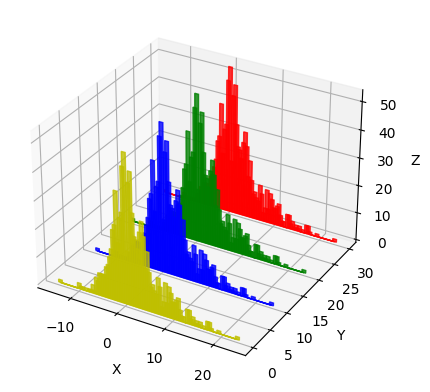

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 100
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    ys = ledat[1]

    hist, bins = np.histogram(ys, bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [22]:
print(out[0])

[[0.         0.00044188 0.00486065 0.02562886 0.06760716 0.12770241
  0.10516669 0.04286205 0.01767507 0.00441877 0.00044188 0.00044188
  0.00044188 0.         0.        ]
 [0.00044188 0.00132563 0.00309314 0.01855883 0.0534671  0.10207355
  0.09411977 0.05567648 0.02341947 0.02386135 0.01060504 0.00662815
  0.00353501 0.00044188 0.00044188]
 [0.         0.         0.00265126 0.01634944 0.05788587 0.1201905
  0.1069342  0.05523461 0.02783824 0.00839566 0.00088375 0.00132563
  0.         0.         0.        ]
 [0.         0.00044188 0.00397689 0.01590757 0.05567648 0.10472481
  0.12063238 0.05656024 0.02783824 0.00972129 0.00176751 0.00044188
  0.         0.         0.        ]
 [0.         0.00044188 0.00220938 0.01237255 0.03755953 0.09898041
  0.09721291 0.07556094 0.03800141 0.02121009 0.01016317 0.00176751
  0.00132563 0.00044188 0.00044188]]
